# Задание по программированию: Линейная алгебра: аппроксимация функций

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

<b>Вы научитесь:</b>
* читать тексты из файла с помощью Python и разбивать их на слова
* переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
* решать системы линейных уравнений
* приближать любые функции с помощью многочленов

<b>Введение</b>

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

<b>Материалы</b>

Справка по функциям пакета scipy.linalg:
http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python:
https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше):
https://docs.python.org/2/library/re.html

<b>Инструкция по выполнению</b>

Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.

<b>Задача 2: аппроксимация функции</b>

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

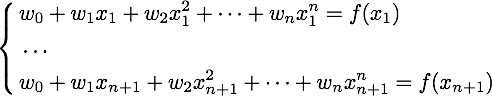

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

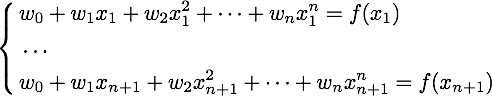

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def initial_function(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)

In [3]:
def approx_function(coefitients, x):
    x = np.array(x)
    f = np.zeros((1, len(x)))[0]
    for i in range(len(coefitients)):
        f += coefitients[i] * (x ** i)
    return f

In [4]:
def to_make_eq_sys(x_val):
    x_val = np.array(x_val)
    eq_sys = []
    for i in range(len(x_val)):
        eq_sys.append(x_val ** i)
    return np.array(eq_sys).T

In [5]:
x_axis = np.arange(1, 15, 0.01)
f_i_axis = initial_function(x_axis)

In [6]:
f_1 = initial_function(1)
f_15 = initial_function(15)

In [7]:
equation_system_1 = to_make_eq_sys([1, 15])
add_vect_1 = np.array([[f_1, f_15]]).T

In [8]:
solution_1 = np.linalg.solve(equation_system_1, add_vect_1)

In [9]:
f_1_axis = approx_function(solution_1, x_axis)

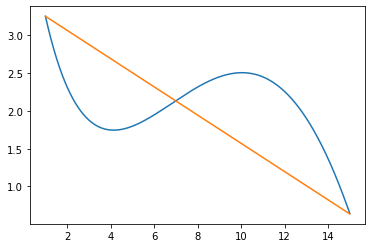

In [10]:
plt.plot(x_axis, f_i_axis, x_axis, f_1_axis)

In [11]:
f_8 = initial_function(8)

In [12]:
equation_system_2 = to_make_eq_sys([1, 8, 15])
add_vect_2 = np.array([[f_1, f_8, f_15]]).T

In [13]:
solution_2 = np.linalg.solve(equation_system_2, add_vect_2)

In [14]:
f_2_axis = approx_function(solution_2, x_axis)

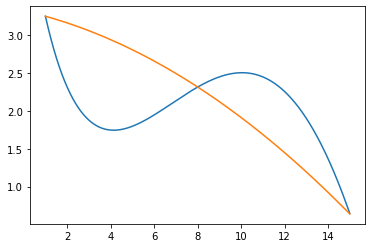

In [15]:
plt.plot(x_axis, f_i_axis, x_axis, f_2_axis)

In [16]:
f_4 = initial_function(4)
f_10 = initial_function(10)

In [17]:
equation_system_3 = to_make_eq_sys([1, 4, 10, 15])
add_vect_3 = np.array([[f_1, f_4, f_10, f_15]]).T

In [18]:
solution_3 = np.linalg.solve(equation_system_3, add_vect_3)

In [19]:
f_3_axis = approx_function(solution_3, x_axis)

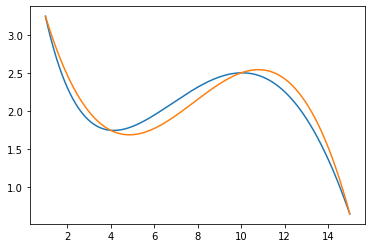

In [20]:
plt.plot(x_axis, f_i_axis, x_axis, f_3_axis)

In [21]:
file = open('result_2.txt', 'w')
sol_str = []
for koef in solution_3.T[0]:
    sol_str.append(str(round(koef, 2)))
file.write(" ".join(sol_str))
file.close()